# Imports

In [725]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import enchant 
import glob

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GRU,TimeDistributed
from tensorflow.keras.utils import get_file

# Methods

In [1134]:
def preprocess(texts): 
    X = np.array(tokenizer.texts_to_sequences(texts))-1
    return tf.one_hot(X,max_id)



# function to select the next character 
def next_char(text,temperature = 1 ):
    x_new = preprocess([text])
    #not sure what its accessing here 
    y_prob = model.predict(x_new, verbose = 0)[0,-1:,:]
    rescaled_logits = tf.math.log(y_prob)/temperature
    char_id = tf.random.categorical(rescaled_logits,num_samples=1)+1 
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

''' input is an alphabetically sorted dictionary ''' 
def remove_nonletters(dictionary):
    
    stop = False
    while stop == False:
        if list(dictionary.keys())[0] == 'a':
            stop = True
        else:
            del dictionary[list(dictionary.keys())[0]]
    
    dictionary = dict(sorted(dictionary.items(), reverse = True, key=lambda item: item[0]))
    
    stop = False
    while stop == False:
        if list(dictionary.keys())[0] == 'z':
            stop = True
        else:
            del dictionary[list(dictionary.keys())[0]]
            
    dictionary = dict(sorted(dictionary.items(), key=lambda item: item[0]))
    
    return dictionary


# #repeatedly call next char and append to previous text 
# def complete_text(text,n_chars=50,temperature=1): 
#     for _ in range(n_chars): 
#         text += next_char(text,temperature)
#     return text


#repeatedly call next char and append to previous text 
def complete_sentence(text,n_words=10,temperature=1): 
    while len(text.split(' ')) < n_words + 1:
        text = text.replace('\n', '')
        text += next_char(text,temperature)
    return text


''' Based off of code I found at: https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/ ''' 
def TF_IDF(corpus):
    words_set = set()

    for doc in  corpus:
        words = doc.split(' ')
        words_set = words_set.union(set(words))

    # print('Number of words in the corpus:',len(words_set))
    # print('The words in the corpus: \n', words_set)
    
    
    n_docs = len(corpus)         #·Number of documents in the corpus
    n_words_set = len(words_set) #·Number of unique words in the 

    df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

    # Compute Term Frequency (TF)
    for i in range(n_docs):
        words = corpus[i].split(' ') # Words in the document
        for w in words:
            df_tf[w][i] = df_tf[w][i] + (1 / len(words))

    return df_tf, words_set

def get_score(data_frame, index):
    res = np.array(data_frame.iloc[index])
    res = np.delete(res, np.where(res == 0))
    sentence1_length = len(res)
    sentence1_score = np.average(res)
    sentence1_std = np.std(res)
    return sentence1_score, sentence1_std


def get_words(words_set):
    d = enchant.Dict("en_US")
    good_words = 0
    bad_words = 0
    for i in words_set:
        if i == '':
            pass
        else:
            if d.check(i) == True:
                good_words += 1
            else:
                bad_words += 1
    return good_words, bad_words

# For Generating New Sentences

In [1157]:
########################## For Alice ##########################

# filename = "alice_in_wonderland.txt"
# f = open(str(filename), 'r')

# alice_corpus = f.read()
# f.close()

# allChars = alice_corpus

# model = load_model('char_alice_model.hdf5')

########################### For NYT ###########################


df = pd.read_csv('CommentsApril2017.csv')

# df.head()
#removing html code and some punctuation 
#will need to remove more in a more efficient manner -__-
df['commentBody'] = df['commentBody'].str.replace('<br/><br/>','')
df['commentBody'] = df['commentBody'].str.replace('<br/>','')
df['commentBody'] = df['commentBody'].str.replace('-','')
df['commentBody'] = df['commentBody'].str.replace('!','')
df['commentBody'] = df['commentBody'].str.replace('?','')
df['commentBody'] = df['commentBody'].str.replace('(','')
df['commentBody'] = df['commentBody'].str.replace(')','')


comments = df['commentBody']


comments = comments.to_numpy()

chars = []
for i in range(len(comments)):
    chars.append(str(comments[i]))

allChars = str(chars)

model = load_model('model.hdf5')

###############################################################

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([allChars])

max_id = len(tokenizer.word_index)
x = tokenizer.document_count
print(max_id)
print(x)

[encoded] = np.array(tokenizer.texts_to_sequences([allChars])) - 1
#print(encoded[0:30])

360
1


In [1158]:
X_new = preprocess(["Lets go to the"])
#Y_pred = model.predict(X_new)
Y_pred = np.argmax(model(X_new),axis = -1)
#predicts the next character for each index of provided sentence
print(tokenizer.sequences_to_texts(Y_pred+1))
#tokenizer.sequences_to_texts(Y_pred+1)[0][-1]

['i       t o t t h   t h e  ']


In [1159]:
a = complete_sentence("A", 15, temperature=0.3)
print(a)

An the the people the reading in the conter the reputions in the sead and 


In [1163]:
n_words = 15
num_sentences = 50

file_name = 'char_NYT_model_temp02'

f = open(file_name, 'w')

for i in range(num_sentences):
    sentence = complete_sentence("A",n_words, temperature=0.2)
    f.write(sentence[:-1] + "\n")

f.close()

In [1161]:
file_name = 'test_NYT_temp01'

corpus = open(file_name).read().splitlines()
corpus = [value for value in corpus if value != '']
corpus = np.char.replace(corpus,',',' ')

In [1162]:
result, words_set = TF_IDF(corpus)
result.head()

,rean,repece,perse,of,An,sean,perical,conter,perice,who,...,seen,wate,people,wat,contion,the,and,with,repuce,perican
0,0.0,0.0,0.0,0.0,0.066667,0.333333,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.066667,0.0,0.000000,0.466667,0.000000,0.000000,0.0,0.066667
1,0.0,0.0,0.0,0.0,0.066667,0.200000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.066667,0.0,0.066667,0.533333,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.066667,0.200000,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.000000,0.0,0.000000,0.533333,0.066667,0.066667,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.066667,0.333333,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.066667,0.0,0.000000,0.466667,0.000000,0.066667,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.066667,0.466667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.466667,0.000000,0.000000,0.0,0.000000


# Char Level Model on Alice Dataset

In [1116]:
filename = "alice_in_wonderland.txt"
f = open(str(filename), 'r')

alice_corpus = f.read()
f.close()

In [1035]:
alice_letter_counter = {}

for string in alice_corpus:
    for i in string:

        char = i

        if char.isupper():
            char = char.lower()

        if char in alice_letter_counter:
            alice_letter_counter[char] += 1
        else:
            alice_letter_counter[char] = 1        


alice_letter_counter = dict(sorted(alice_letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically
alice_letter_counter = remove_nonletters(alice_letter_counter)

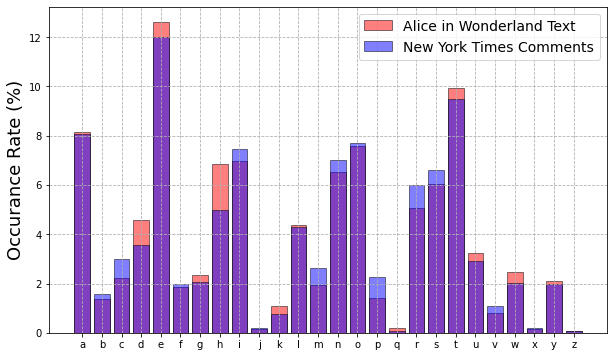

In [1263]:
fig, ax = plt.subplots(figsize = (10, 6))

alice_vals = np.array(list(alice_letter_counter.values()))/sum(alice_letter_counter.values())
NYT_vals = np.array(list(comments_letter_counter.values()))/sum(comments_letter_counter.values())

ax.bar(alice_letter_counter.keys(), 100*alice_vals, color='r', edgecolor = 'black', alpha = 0.5, label = 'Alice in Wonderland Text')
ax.bar(comments_letter_counter.keys(), 100*NYT_vals, color='b', edgecolor = 'black', alpha = 0.5, label = 'New York Times Comments')
ax.grid(linestyle = '--')
ax.legend(fontsize = 14)
ax.set_ylabel('Occurance Rate (%)', fontsize = 18)

plt.savefig('fig3.pdf')
plt.show()

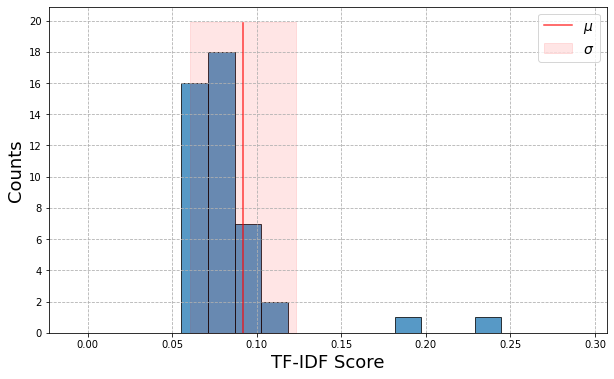

In [1198]:
test_alice_hist = [a for a in alice_corpus.split('\n')[100:150] if a != '']

for i in range(len(test_alice_hist)):
    test_alice_hist[i] = ' '.join(test_alice_hist[i].split(' ')[:16])
    

result, words_set = TF_IDF(test_alice_hist)

fig, ax = plt.subplots(figsize = (10,6))

alice_scores = []
for i in range(len(result)):
    alice_score, std = get_score(result, i)
    alice_scores.append(alice_score)

bins = np.linspace(0, 0.3, 20)
# bins = np.linspace(0.06, 0.08, 20)
    
ax.hist(alice_scores, bins = bins, align = 'left', edgecolor = 'black', alpha = 0.75)
ax.axvline(x=np.average(alice_scores), ymax = 0.95, linestyle = '-', color = 'red', label = r'$\mu$', alpha = 0.75)

ax.fill_betweenx(np.arange(0,20,0.1), np.average(alice_scores) - np.std(alice_scores), np.average(alice_scores) + np.std(alice_scores), 
                 color='red', alpha=.1, label = r'$\sigma$')

ax.set_yticks(np.linspace(0,20,11))
ax.set_xlabel('TF-IDF Score', fontsize = 18)
ax.set_ylabel('Counts', fontsize = 18)
ax.grid(linestyle = '--')
ax.legend(fontsize = 14)

alice_good_words, alice_bad_words = get_words(words_set) 

plt.show()

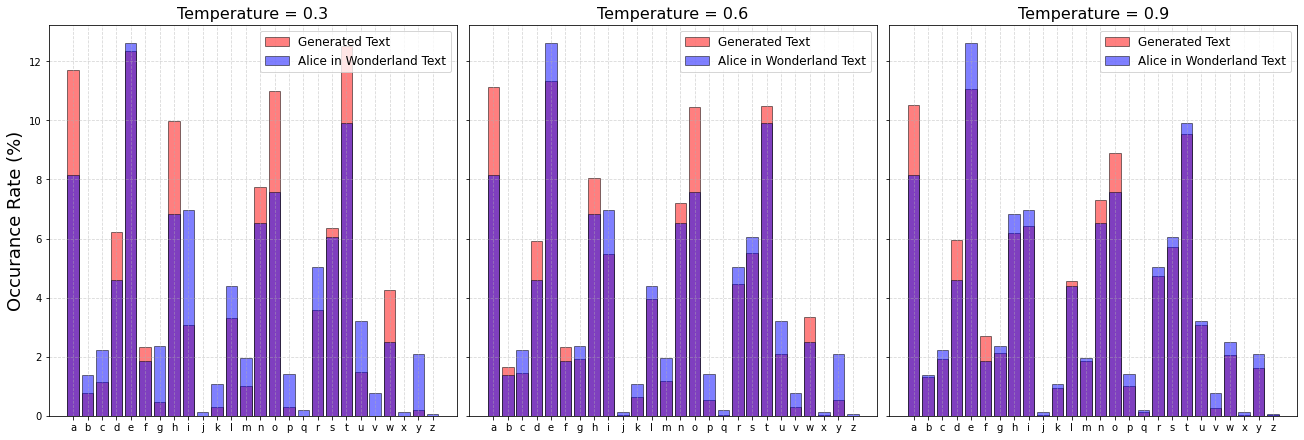

In [1264]:
error_alice = []

fig, ax = plt.subplots(1,3,figsize = (18,6), sharey = True, constrained_layout = True)

a = sorted(glob.glob('char_model*'))
a.remove('char_model_temp09_oldexample')

for file_name in a:
    plot_num = int(file_name[-1])
    
    
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != ''] # get rid of null strings

    letter_counter = {}

    for string in corpus:
        for i in string:

            char = i

            if char.isupper():
                char = char.lower()

            if char in letter_counter:
                letter_counter[char] += 1
            else:
                letter_counter[char] = 1        

    letter_counter = dict(sorted(letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically

    for i in alice_letter_counter.keys():
        if i in letter_counter:
            pass
        else:
            letter_counter[i] = 0

    letter_counter = remove_nonletters(letter_counter)


    gen_norm = np.array(list(letter_counter.values()))/sum(letter_counter.values())
    
    error_alice.append(sum(abs(100*alice_vals - 100*gen_norm))/len(alice_vals))
    
    if plot_num % 3 == 0:

        # ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black')

        ax[int(plot_num/3 - 1)].bar(letter_counter.keys(), 100*gen_norm, color='r', edgecolor = 'black', alpha = 0.5, label = 'Generated Text')
        ax[int(plot_num/3 - 1)].bar(alice_letter_counter.keys(), 100*alice_vals, color = 'b', edgecolor = 'black', 
                                    alpha = 0.5, label = 'Alice in Wonderland Text')

        ax[int(plot_num/3 - 1)].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 16)
        ax[int(plot_num/3 - 1)].grid(linestyle = '--', alpha = 0.5)    
        ax[int(plot_num/3 - 1)].legend(fontsize = 12)  

ax[0].set_ylabel('Occurance Rate (%)', fontsize = 18)

plt.savefig('fig4.pdf')

plt.show()

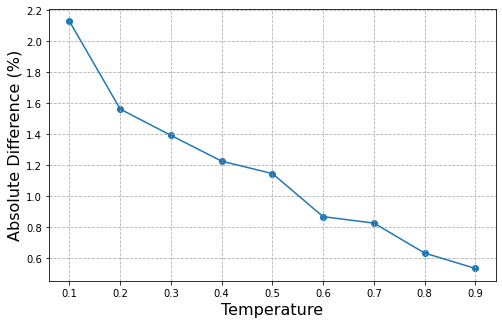

In [1265]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
# ax.scatter(t, error, label = 'From Average')
# ax.plot(t, error)

ax.scatter(t, error_alice, label = 'From Alice')
ax.plot(t, error_alice)


# ax.scatter(t, error_NYT, label = 'From NYT')
# ax.plot(t, error_NYT)


ax.grid(linestyle = '--')
# ax.legend(fontsize = 16)
ax.set_ylabel('Absolute Difference (%)', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.savefig('fig5.pdf')

plt.show()

# Alternative Plot

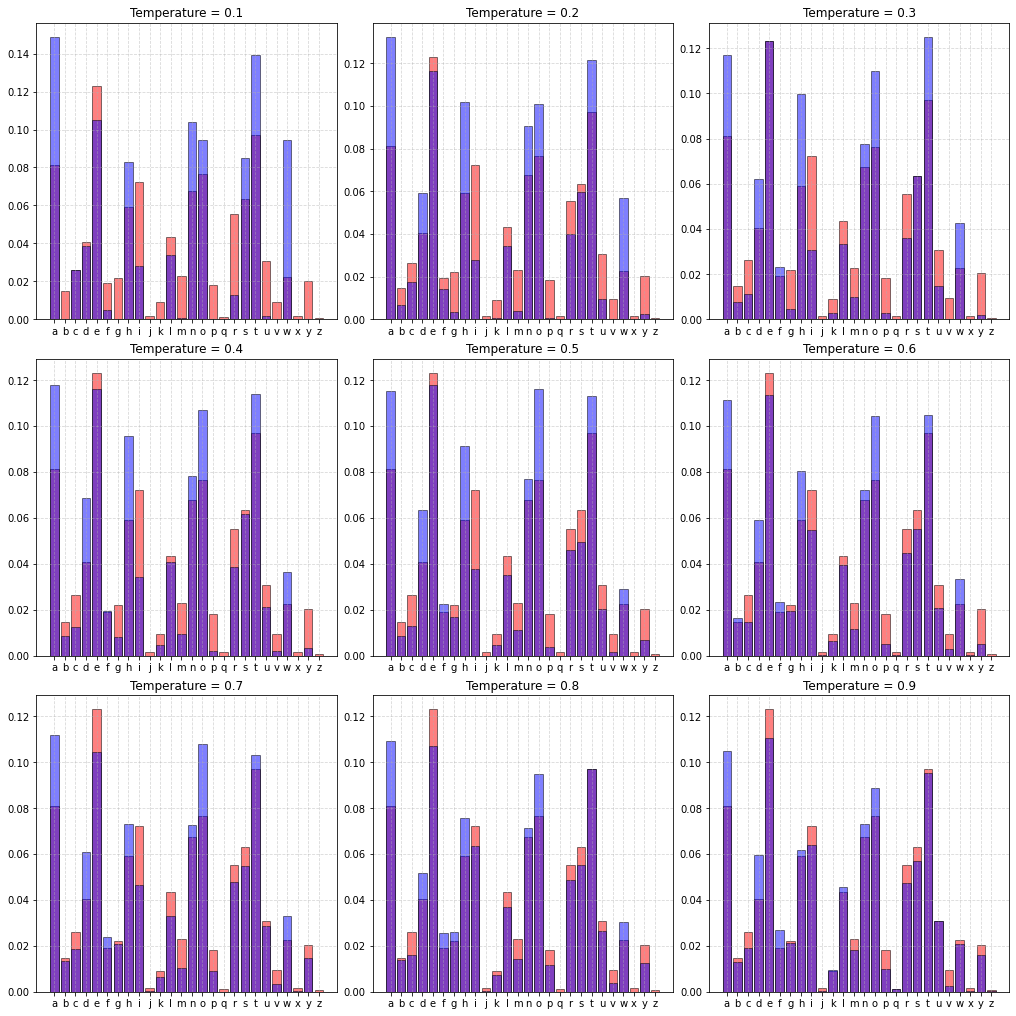

In [823]:
num_words = 15
error = []

fig, ax = plt.subplots(3,3,figsize = (14,14), constrained_layout = True)

a = sorted(glob.glob('char_model*'))
a.remove('char_model_temp09_oldexample')

for file_name in a:
    plot_num = int(file_name[-1])
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != ''] # get rid of null strings
    
    letter_counter = {}

    for string in corpus:
        for i in string:

            char = i
            
            if char.isupper():
                char = char.lower()
                
            if char in letter_counter:
                letter_counter[char] += 1
            else:
                letter_counter[char] = 1        
                
    letter_counter = dict(sorted(letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically
    
    for i in alice_letter_counter.keys():
        if i in letter_counter:
            pass
        else:
            letter_counter[i] = 0
            
    letter_counter = remove_nonletters(letter_counter)
    
    
    gen_norm = np.array(list(letter_counter.values()))/sum(letter_counter.values())
    
    # ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].bar(alice_letter_counter.keys(), avg_vals, color = 'r', edgecolor = 'black', alpha = 0.5)

    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].bar(letter_counter.keys(), gen_norm, color='b', edgecolor = 'black', alpha = 0.5)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 12)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].grid(linestyle = '--', alpha = 0.5)    

    
    error.append(sum(abs(avg_vals - gen_norm)))
    
plt.show()

#

### Word Quality

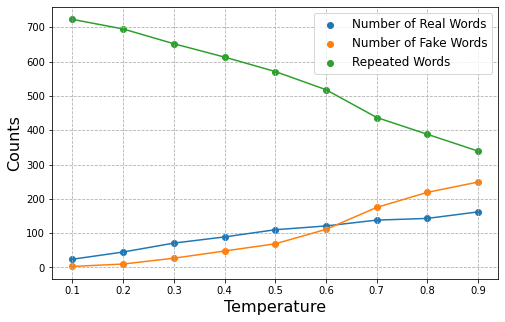

In [1266]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(t, good_words_list, label = 'Number of Real Words')
ax.plot(t, good_words_list)

ax.scatter(t, bad_words_list, label = 'Number of Fake Words')
ax.plot(t, bad_words_list)

ax.scatter(t, (750 - good_words_list - bad_words_list), label = 'Repeated Words')
ax.plot(t, (750 - good_words_list - bad_words_list))



ax.legend(fontsize = 12)
ax.grid(linestyle = '--')

ax.set_ylabel('Counts', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.savefig('fig6.pdf')

plt.show()

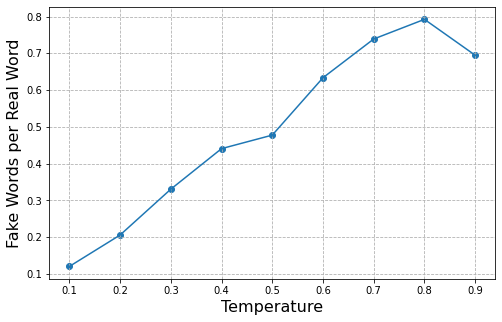

In [1267]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
# ax.scatter(t, good_words_list/bad_words_list)
# ax.plot(t, good_words_list/bad_words_list)


alice_metric = (750 - good_words_list - bad_words_list)*bad_words_list/good_words_list/750
ax.scatter(t, alice_metric)
ax.plot(t, alice_metric)


# ax.legend(fontsize = 16)
ax.grid(linestyle = '--')

# ax.set_ylabel('# of Real Words per Fake Word', fontsize = 16)
ax.set_ylabel('Fake Words per Real Word', fontsize = 16)

ax.set_xlabel('Temperature', fontsize = 16)

plt.savefig('fig7.pdf')

plt.show()

### TF-IDF Score

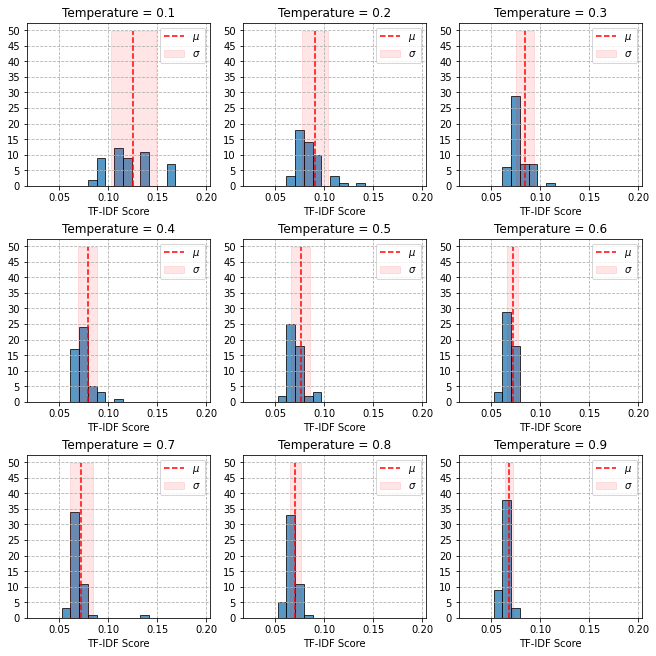

In [1203]:
sigma_list = []
error_list = []
good_words_list = []
bad_words_list = []

fig, ax = plt.subplots(3,3,figsize = (9,9), constrained_layout = True)

# a = sorted(glob.glob('word*'))
a = sorted(glob.glob('char_model*'))
a.remove('char_model_temp09_oldexample')


for file_name in a:
    plot_num = int(file_name[-1])
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != '']
    result, words_set = TF_IDF(corpus)
  
    scores = []
    for i in range(len(result)):
        score, std = get_score(result, i)
        scores.append(score)

    bins = np.linspace(0.03, 0.2, 20)
    # bins = np.linspace(0.06, 0.08, 20)

    
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black', alpha = 0.75)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 12)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].axvline(x=np.average(scores), ymax = 0.95, linestyle = '--', color = 'red', label = r'$\mu$')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_yticks(np.linspace(0,50,11))
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_xlabel('TF-IDF Score')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].grid(linestyle = '--')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].fill_betweenx(np.arange(0,50,0.1), np.average(scores) - np.std(scores), 
                                                              np.average(scores) + np.std(scores), color='red', alpha=.1, label = r'$\sigma$')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].legend()

    
    # ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(alice_scores, bins = bins, align = 'left', edgecolor = 'black')



    good_words, bad_words = get_words(words_set) 
    
    good_words_list.append(good_words)
    bad_words_list.append(bad_words)
    error_list.append(np.average(scores))
    sigma_list.append(np.std(scores))
    
plt.show()

good_words_list = np.array(good_words_list)
bad_words_list = np.array(bad_words_list)
error_list = np.array(error_list)

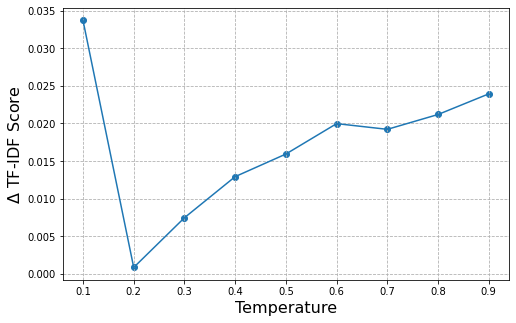

In [1204]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))

diff = abs(error_list - np.average(alice_scores))
ax.scatter(t, diff)
ax.plot(t, diff)

ax.grid(linestyle = '--')

ax.set_ylabel(r'$\Delta$ TF-IDF Score', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

# Combining All Metrics

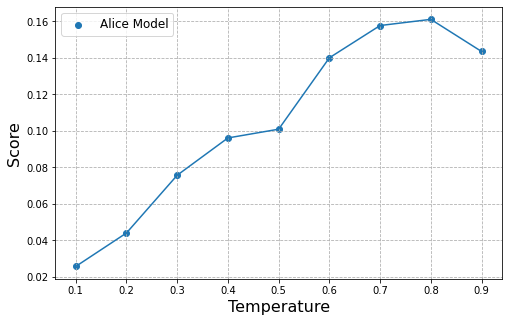

In [1261]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))

ax.scatter(t, error_alice*alice_metric, label = 'Alice Model')
ax.plot(t, error_alice*alice_metric)

# ax.scatter(t, error_alice*(bad_words_list/good_words_list))
# ax.plot(t, error_alice*(bad_words_list/good_words_list))


ax.grid(linestyle = '--')
ax.legend(fontsize = 12)

ax.set_ylabel('Score', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)


plt.show()

In [ ]:
# Include the NYT plot in the above!

# Word Model

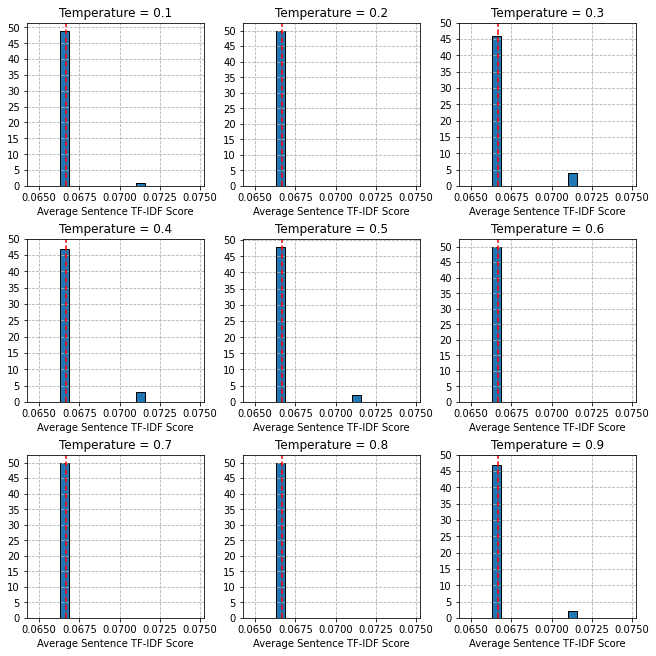

In [1269]:
error_list = []
good_words_list = []
bad_words_list = []

num_words = 15

fig, ax = plt.subplots(3,3,figsize = (9,9), constrained_layout = True)

a = sorted(glob.glob('word*'))


for file_name in a:
    plot_num = int(file_name[-1])
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != '']
    result, words_set = TF_IDF(corpus)
    

    scores = []
    for i in range(len(result)):
        score, std = get_score(result, i)
        scores.append(score)

    bins = np.linspace(0.065, 0.075, 20)

    
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 12)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].axvline(x = 1/num_words, linestyle = '--', color = 'red')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_yticks(np.linspace(0,50,11))
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_xlabel('Average Sentence TF-IDF Score')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].grid(linestyle = '--')


    good_words, bad_words = get_words(words_set) 
    
    good_words_list.append(good_words)
    bad_words_list.append(bad_words)
    error_list.append(np.average(scores))
    
    
plt.show()

good_words_list = np.array(good_words_list)
bad_words_list = np.array(bad_words_list)
error_list = np.array(error_list)

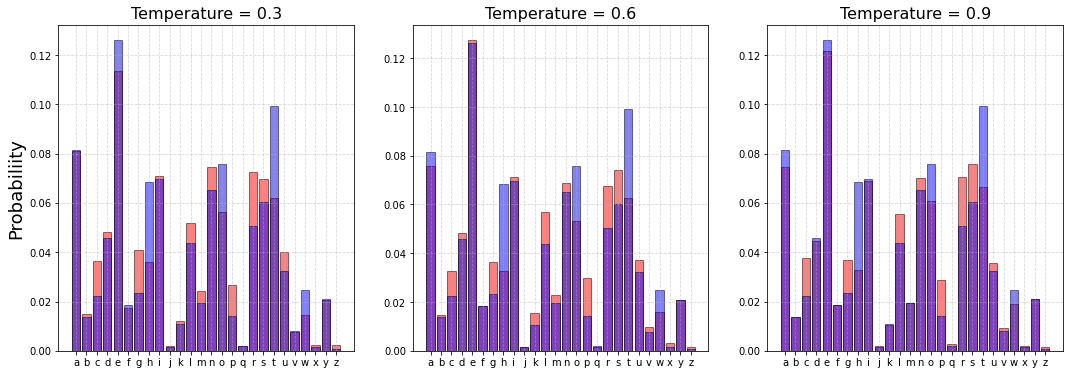

In [1270]:
fig, ax = plt.subplots(1,3,figsize = (18,6))

a = sorted(glob.glob('word*'))

num_words = 15
error = []
error_alice = []
error_NYT = []

for file_name in a:
    plot_num = int(file_name[-1])
    
    
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != ''] # get rid of null strings

    letter_counter = {}

    for string in corpus:
        for i in string:

            char = i

            if char.isupper():
                char = char.lower()

            if char in letter_counter:
                letter_counter[char] += 1
            else:
                letter_counter[char] = 1        

    letter_counter = dict(sorted(letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically

    for i in alice_letter_counter.keys():
        if i in letter_counter:
            pass
        else:
            letter_counter[i] = 0

    letter_counter = remove_nonletters(letter_counter)


    gen_norm = np.array(list(letter_counter.values()))/sum(letter_counter.values())
    
    error.append(sum(abs(avg_vals - gen_norm)))
    error_alice.append(sum(abs(alice_vals - gen_norm)))
    error_NYT.append(sum(abs(NYT_vals - gen_norm)))
    
    if plot_num % 3 == 0:

        # ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black')

        ax[int(plot_num/3 - 1)].bar(letter_counter.keys(), gen_norm, color='r', edgecolor = 'black', alpha = 0.5)
        ax[int(plot_num/3 - 1)].bar(alice_letter_counter.keys(), alice_vals, color = 'b', edgecolor = 'black', alpha = 0.5)

        ax[int(plot_num/3 - 1)].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 16)
        ax[int(plot_num/3 - 1)].grid(linestyle = '--', alpha = 0.5)    

ax[0].set_ylabel('Probabiliity', fontsize = 18)


plt.show()

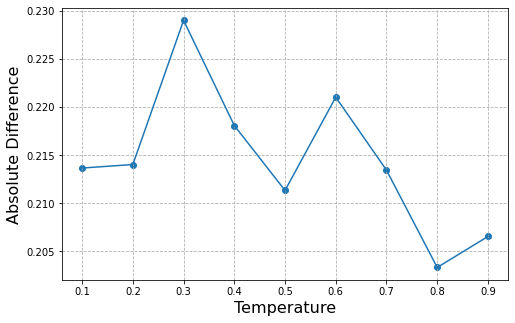

In [1253]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
# ax.scatter(t, error, label = 'From Average')
# ax.plot(t, error)

ax.scatter(t, error_alice, label = 'From Alice')
ax.plot(t, error_alice)


# ax.scatter(t, error_NYT, label = 'From NYT')
# ax.plot(t, error_NYT)


ax.grid(linestyle = '--')
# ax.legend(fontsize = 16)
ax.set_ylabel('Absolute Difference', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)


plt.show()

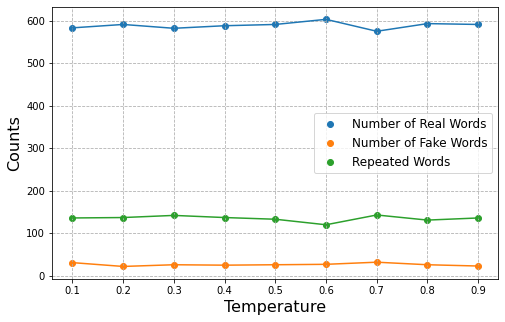

In [1029]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(t, good_words_list, label = 'Number of Real Words')
ax.plot(t, good_words_list)

ax.scatter(t, bad_words_list, label = 'Number of Fake Words')
ax.plot(t, bad_words_list)

ax.scatter(t, (750 - good_words_list - bad_words_list), label = 'Repeated Words')
ax.plot(t, (750 - good_words_list - bad_words_list))



ax.legend(fontsize = 12)
ax.grid(linestyle = '--')

ax.set_ylabel('Counts', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

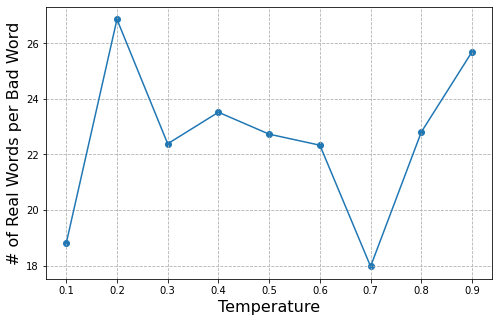

In [1030]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(t, good_words_list/bad_words_list)
ax.plot(t, good_words_list/bad_words_list)

# ax.legend(fontsize = 16)
ax.grid(linestyle = '--')

ax.set_ylabel('# of Real Words per Bad Word', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

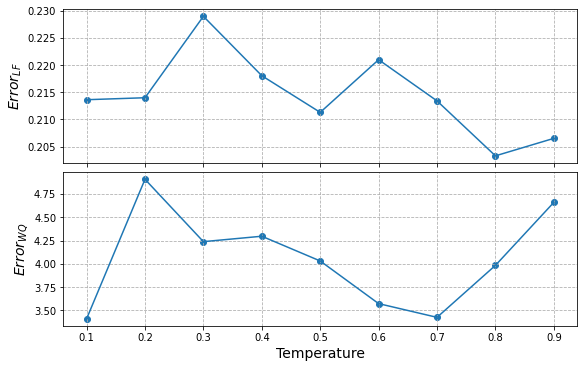

In [1280]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(2, figsize = (8, 5), sharex = True, constrained_layout = True)


ax[0].scatter(t, error_alice, label = 'From Alice')
ax[0].plot(t, error_alice)




ax[0].grid(linestyle = '--')
# ax.legend(fontsize = 16)
ax[0].set_ylabel(r'$Error_{LF}$', fontsize = 14)





total_words = 750


ax[1].scatter(t, (750 - good_words_list - bad_words_list)*good_words_list/bad_words_list/750)
ax[1].plot(t, (750 - good_words_list - bad_words_list)*good_words_list/bad_words_list/750)

# ax.legend(fontsize = 16)
ax[1].grid(linestyle = '--')

ax[1].set_ylabel(r'$Error_{WQ}$', fontsize = 14)
ax[1].set_xlabel('Temperature', fontsize = 14)

plt.savefig('fig9.pdf')
plt.show()

# NYT Comments

In [1106]:
#NYT comments dataset 
df = pd.read_csv('CommentsApril2017.csv')

# df.head()
#removing html code and some punctuation 
#will need to remove more in a more efficient manner -__-
df['commentBody'] = df['commentBody'].str.replace('<br/><br/>','')
df['commentBody'] = df['commentBody'].str.replace('<br/>','')
df['commentBody'] = df['commentBody'].str.replace('-','')
df['commentBody'] = df['commentBody'].str.replace('!','')
df['commentBody'] = df['commentBody'].str.replace('?','')
df['commentBody'] = df['commentBody'].str.replace('(','')
df['commentBody'] = df['commentBody'].str.replace(')','')


NYT_corpus = list(df['commentBody'])

/Users/willbidle/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1092]:
NYT_letter_counter = {}

for string in comments_corpus:
    for i in string:

        char = i

        if char.isupper():
            char = char.lower()

        if char in NYT_letter_counter:
            NYT_letter_counter[char] += 1
        else:
            NYT_letter_counter[char] = 1        


comments_letter_counter = dict(sorted(NYT_letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically
comments_letter_counter = remove_nonletters(comments_letter_counter)
del comments_letter_counter['i̇'] # remove a weird character that shows up

In [1184]:
for i in range(50):
    NYT_corpus[i] = ' '.join(NYT_corpus[i].split(' ')[:16])

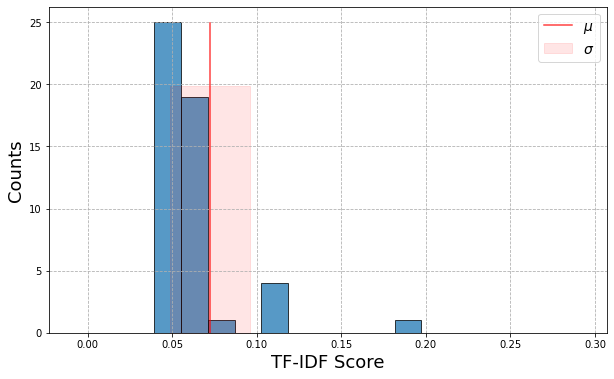

In [1185]:
NYT_scores = []
result, words_set = TF_IDF(NYT_corpus[:50])

fig, ax = plt.subplots(figsize = (10,6))

alice_scores = []
for i in range(len(result)):
    NYT_score, std = get_score(result, i)
    NYT_scores.append(NYT_score)

bins = np.linspace(0, 0.3, 20)
# bins = np.linspace(0.06, 0.08, 20)
    
ax.hist(NYT_scores, bins = bins, align = 'left', edgecolor = 'black', alpha = 0.75)
ax.axvline(x=np.average(NYT_scores), ymax = 0.95, linestyle = '-', color = 'red', label = r'$\mu$', alpha = 0.75)

ax.fill_betweenx(np.arange(0,20,0.1), np.average(NYT_scores) - np.std(NYT_scores), np.average(NYT_scores) + np.std(NYT_scores), 
                 color='red', alpha=.1, label = r'$\sigma$')

# ax.set_yticks(np.linspace(0,20,11))
ax.set_xlabel('TF-IDF Score', fontsize = 18)
ax.set_ylabel('Counts', fontsize = 18)
ax.grid(linestyle = '--')
ax.legend(fontsize = 14)

NYT_good_words, NYT_bad_words = get_words(words_set) 

plt.show()

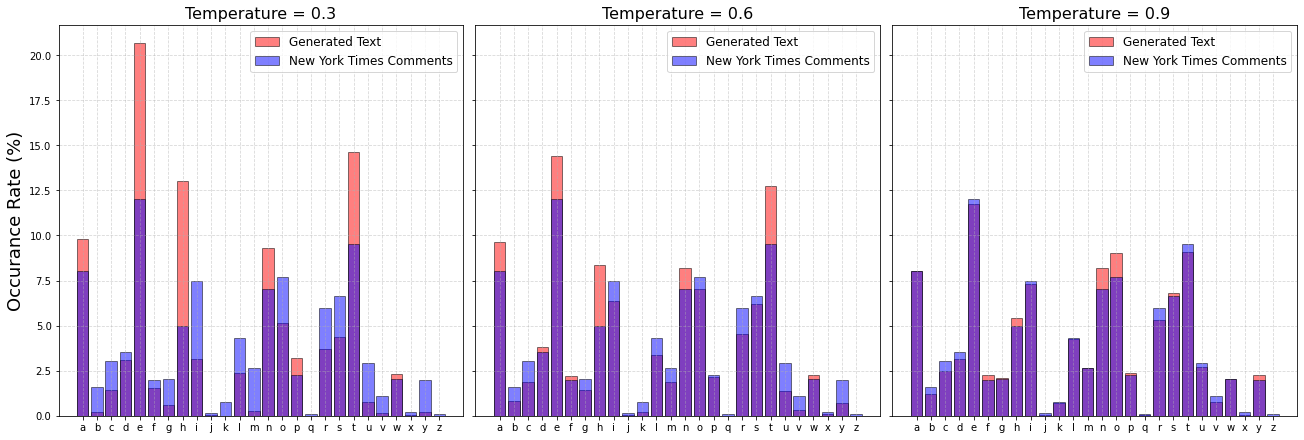

In [1174]:
error_NYT = []

fig, ax = plt.subplots(1,3,figsize = (18,6), sharey = True, constrained_layout = True)

a = sorted(glob.glob('char_NYT*'))
a.remove('char_NYT_model.hdf5')

for file_name in a:
    plot_num = int(file_name[-1])
    
    
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != ''] # get rid of null strings

    letter_counter = {}

    for string in corpus:
        for i in string:

            char = i

            if char.isupper():
                char = char.lower()

            if char in letter_counter:
                letter_counter[char] += 1
            else:
                letter_counter[char] = 1        

    letter_counter = dict(sorted(letter_counter.items(), key=lambda item: item[0])) # sort the dictionary alphabetically

    for i in alice_letter_counter.keys():
        if i in letter_counter:
            pass
        else:
            letter_counter[i] = 0

    letter_counter = remove_nonletters(letter_counter)


    gen_norm = np.array(list(letter_counter.values()))/sum(letter_counter.values())
    
    error_NYT.append(sum(abs(100*NYT_vals - 100*gen_norm))/len(NYT_vals))
    
    if plot_num % 3 == 0:

        # ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black')

        ax[int(plot_num/3 - 1)].bar(letter_counter.keys(), 100*gen_norm, color='r', edgecolor = 'black', alpha = 0.5, label = 'Generated Text')
        ax[int(plot_num/3 - 1)].bar(comments_letter_counter.keys(), 100*NYT_vals, color = 'b', edgecolor = 'black', 
                                    alpha = 0.5, label = 'New York Times Comments')

        ax[int(plot_num/3 - 1)].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 16)
        ax[int(plot_num/3 - 1)].grid(linestyle = '--', alpha = 0.5)    
        ax[int(plot_num/3 - 1)].legend(fontsize = 12)  

ax[0].set_ylabel('Occurance Rate (%)', fontsize = 18)

plt.show()

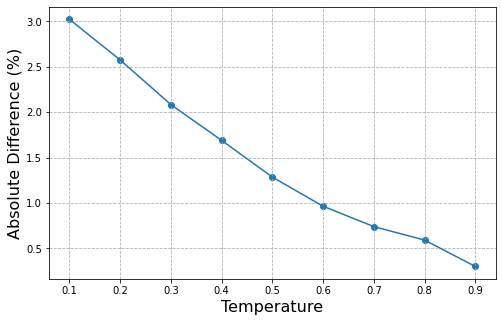

In [1176]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
# ax.scatter(t, error, label = 'From Average')
# ax.plot(t, error)



ax.scatter(t, error_NYT, label = 'From NYT')
ax.plot(t, error_NYT)


ax.grid(linestyle = '--')
# ax.legend(fontsize = 16)
ax.set_ylabel('Absolute Difference (%)', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

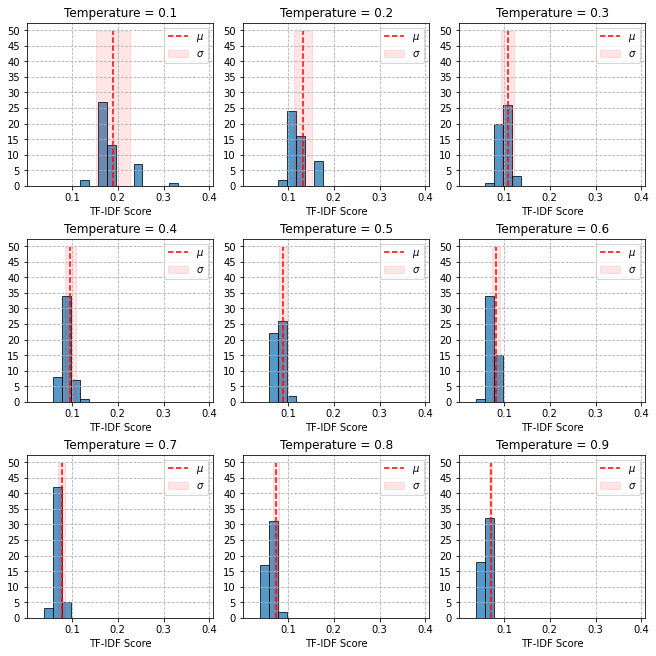

In [1179]:
sigma_list = []
NYT_error_list = []
NYT_good_words_list = []
NYT_bad_words_list = []

fig, ax = plt.subplots(3,3,figsize = (9,9), constrained_layout = True)

a = sorted(glob.glob('char_NYT*'))
a.remove('char_NYT_model.hdf5')


for file_name in a:
    plot_num = int(file_name[-1])
    
    corpus = open(file_name).read().splitlines()
    corpus = [value for value in corpus if value != '']
    result, words_set = TF_IDF(corpus)
  
    scores = []
    for i in range(len(result)):
        score, std = get_score(result, i)
        scores.append(score)

    bins = np.linspace(0.03, 0.4, 20)
    # bins = np.linspace(0.06, 0.08, 20)

    
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].hist(scores, bins = bins, align = 'left', edgecolor = 'black', alpha = 0.75)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_title('Temperature = 0.%s' % file_name[-1:], fontsize = 12)
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].axvline(x=np.average(scores), ymax = 0.95, linestyle = '--', color = 'red', label = r'$\mu$')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_yticks(np.linspace(0,50,11))
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].set_xlabel('TF-IDF Score')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].grid(linestyle = '--')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].fill_betweenx(np.arange(0,50,0.1), np.average(scores) - np.std(scores), 
                                                              np.average(scores) + np.std(scores), color='red', alpha=.1, label = r'$\sigma$')
    ax[int((plot_num-1) / 3)][(plot_num-1) % 3].legend()



    good_words, bad_words = get_words(words_set) 
    
    NYT_good_words_list.append(good_words)
    NYT_bad_words_list.append(bad_words)
    NYT_error_list.append(np.average(scores))
    
plt.show()

NYT_good_words_list = np.array(NYT_good_words_list)
NYT_bad_words_list = np.array(NYT_bad_words_list)
NYT_error_list = np.array(NYT_error_list)

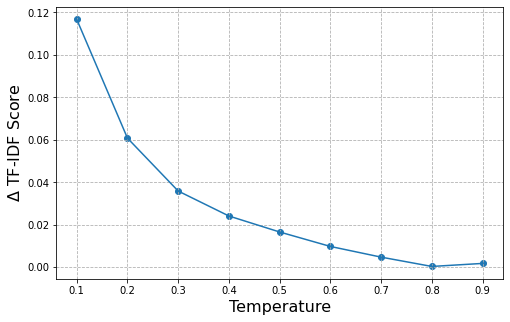

In [1189]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))

NYT_diff = abs(NYT_error_list - np.average(NYT_scores))
# diff = NYT_error_list

ax.scatter(t, NYT_diff)
ax.plot(t, NYT_diff)

ax.grid(linestyle = '--')

ax.set_ylabel(r'$\Delta$ TF-IDF Score', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

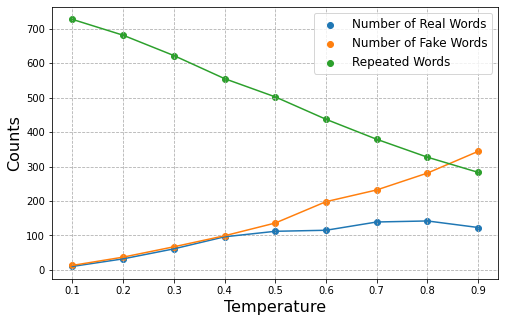

In [1190]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(t, NYT_good_words_list, label = 'Number of Real Words')
ax.plot(t, NYT_good_words_list)

ax.scatter(t, NYT_bad_words_list, label = 'Number of Fake Words')
ax.plot(t, NYT_bad_words_list)

ax.scatter(t, (750 - NYT_good_words_list - NYT_bad_words_list), label = 'Repeated Words')
ax.plot(t, (750 - NYT_good_words_list - NYT_bad_words_list))



ax.legend(fontsize = 12)
ax.grid(linestyle = '--')

ax.set_ylabel('Counts', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

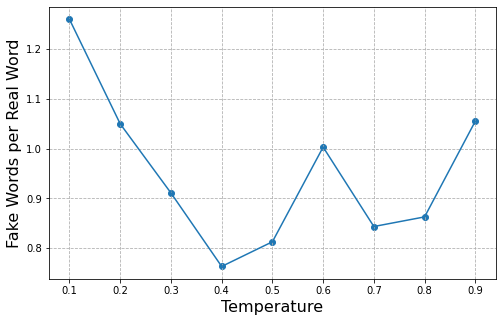

In [1245]:
total_words = 750

t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))
# ax.scatter(t, good_words_list/bad_words_list)
# ax.plot(t, good_words_list/bad_words_list)


ax.scatter(t, (750 - NYT_good_words_list - NYT_bad_words_list)*NYT_bad_words_list/NYT_good_words_list/750)
ax.plot(t, (750 - NYT_good_words_list - NYT_bad_words_list)*NYT_bad_words_list/NYT_good_words_list/750)


# ax.legend(fontsize = 16)
ax.grid(linestyle = '--')

# ax.set_ylabel('# of Real Words per Fake Word', fontsize = 16)
ax.set_ylabel('Fake Words per Real Word', fontsize = 16)

ax.set_xlabel('Temperature', fontsize = 16)

plt.show()

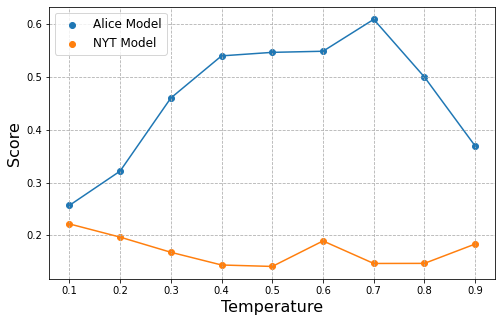

In [1268]:
t = np.linspace(0.1,0.9, 9)
fig, ax = plt.subplots(figsize = (8, 5))

ax.scatter(t, (750 - good_words_list - bad_words_list)*error_alice*(bad_words_list/good_words_list)/750, label = 'Alice Model')
ax.plot(t, (750 - good_words_list - bad_words_list)*error_alice*(bad_words_list/good_words_list)/750)

ax.scatter(t, (750 - NYT_good_words_list - NYT_bad_words_list)*error_NYT*(NYT_bad_words_list/NYT_good_words_list)/750, label = 'NYT Model')
ax.plot(t, (750 - NYT_good_words_list - NYT_bad_words_list)*error_NYT*(NYT_bad_words_list/NYT_good_words_list)/750)

ax.grid(linestyle = '--')
ax.legend(fontsize = 12)

ax.set_ylabel('Score', fontsize = 16)
ax.set_xlabel('Temperature', fontsize = 16)

plt.savefig('fig8.pdf')
plt.show()